In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

# Task1

In [2]:
data_dict = sio.loadmat('iris')
samples = data_dict['samples']
labels = data_dict['labels']

N, D = samples.shape
N, C = labels.shape

idx = list(range(N))
np.random.shuffle(idx)
samples = samples[idx]
labels = labels[idx]

samples /= np.max(np.abs(samples))
samples -= np.mean(samples, axis=0)
training_num = int(N*0.8)

training_samples = samples[:training_num]
training_labels = labels[:training_num]
testing_samples = samples[training_num:]
testing_labels = labels[training_num:]

## Using $ReLU$ as the Activation Function

1.0


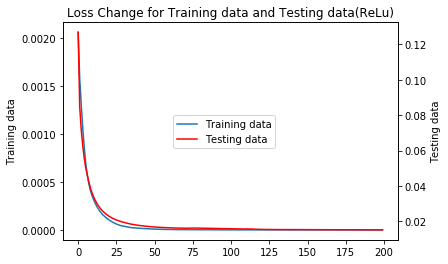

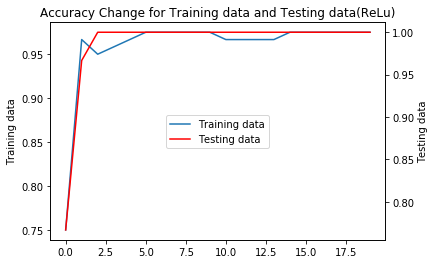

In [8]:
H = 15
batch_size = 2
iter_per_epoch = int(np.ceil(training_num/batch_size))
epoch_num = 200
N, D_in, H, D_out = training_num, D, H, C

x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))
b1 = tf.Variable(tf.random_normal((1, H)))

h1 = tf.matmul(x, w1)
h = tf.add(h1, b1)
h_relu = tf.maximum(h, tf.zeros(1))
y_pred = tf.matmul(h_relu, w2)

loss = tf.reduce_mean((y-y_pred)**2)

grad_w1, grad_w2, grad_b1= tf.gradients(loss, [w1, w2, b1])

learning_rate = 0.1
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)
new_b1 = b1.assign(b1 - learning_rate * grad_b1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_vals = []
    loss_vals_testing = []
    accuracy_training = []
    accuracy_testing = []
    for epoch in range(epoch_num):
        loss_epoch = 0
        for i in range(iter_per_epoch):
            xb = training_samples[i*batch_size:(i+1)*batch_size]
            yb = training_labels[i*batch_size:(i+1)*batch_size]
            loss_value, _, _,_= sess.run([loss, new_w1, new_w2, new_b1], 
                                        feed_dict={x:xb,y:yb})
            loss_epoch += loss_value
        loss_vals.append(loss_value/iter_per_epoch)
        loss_value = sess.run([loss], feed_dict={x:testing_samples,y:testing_labels})
        loss_vals_testing.append(loss_value)
        if epoch % 10 == 0:
            [y_pred1] = sess.run([y_pred], feed_dict={x:training_samples})
            corrects = 0
            for (y1, y2) in zip(y_pred1, training_labels):
                label = y1.argmax(axis=0)
                corrects += y2[label] 
            accuracy_training.append(corrects/len(training_labels))
           
            [y_pred1] = sess.run([y_pred], feed_dict={x:testing_samples})
            corrects = 0
            for (y1, y2) in zip(y_pred1, testing_labels):
                label = y1.argmax(axis=0)
                corrects += y2[label] 
            accuracy_testing.append(corrects/len(testing_labels))
    
    fig1 = plt.figure()
    ax11 = fig1.add_subplot(111)
    ax11.set_title('Loss Change for Training data and Testing data(ReLu)')
    ax11.plot(loss_vals, label='Training data')
    ax11.set_ylabel('Training data')
    ax12 = ax11.twinx() 
    ax12.plot(loss_vals_testing, 'r', label='Testing data')
    ax12.set_ylabel('Testing data')
    fig1.legend(loc='center')
    
    fig2 = plt.figure()
    ax21 = fig2.add_subplot(111)
    ax21.set_title('Accuracy Change for Training data and Testing data(ReLu)')
    ax21.plot(accuracy_training, label='Training data')
    ax21.set_ylabel('Training data')
    ax22 = ax21.twinx() 
    ax22.plot(accuracy_testing, 'r', label='Testing data')
    ax22.set_ylabel('Testing data')
    fig2.legend(loc='center')
    #plt.plot(range(1, epoch_num+1), loss_vals, loss_vals_pre)
    
    [y_pred1] = sess.run([y_pred], feed_dict={x:testing_samples})
    corrects = 0
    for (y1, y) in zip(y_pred1, testing_labels):
        label = y1.argmax(axis=0)
        corrects += y[label]
    print (corrects/len(testing_samples))
        

## Using $Sigmoid$ as the Activation Function

0.9666666666666667


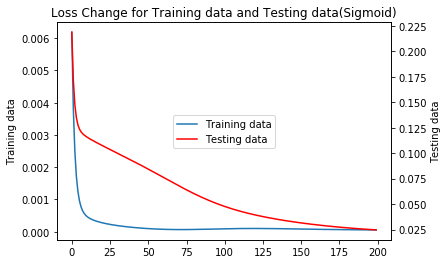

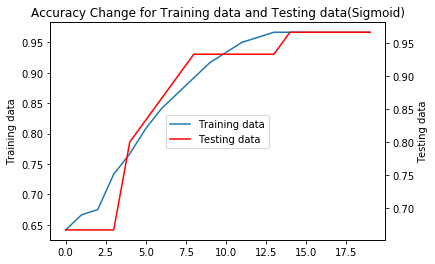

In [20]:
H = 10
batch_size = 2
iter_per_epoch = int(np.ceil(training_num/batch_size))
epoch_num = 200
N, D_in, H, D_out = training_num, D, H, C

x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))
b1 = tf.Variable(tf.random_normal((1, H)))

h1 = tf.matmul(x, w1)
h = tf.add(h1, b1)
h_sigmoid = tf.sigmoid(h)
y_pred = tf.matmul(h_sigmoid, w2)

loss = tf.reduce_mean((y-y_pred)**2)

grad_w1, grad_w2, grad_b1= tf.gradients(loss, [w1, w2, b1])

learning_rate = 0.1
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)
new_b1 = b1.assign(b1 - learning_rate * grad_b1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_vals = []
    loss_vals_testing = []
    accuracy_training = []
    accuracy_testing = []
    for epoch in range(epoch_num):
        loss_epoch = 0
        for i in range(iter_per_epoch):
            xb = training_samples[i*batch_size:(i+1)*batch_size]
            yb = training_labels[i*batch_size:(i+1)*batch_size]
            loss_value, _, _,_= sess.run([loss, new_w1, new_w2, new_b1], 
                                        feed_dict={x:xb,y:yb})
            loss_epoch += loss_value
        loss_vals.append(loss_value/iter_per_epoch)
        loss_value = sess.run([loss], feed_dict={x:testing_samples,y:testing_labels})
        loss_vals_testing.append(loss_value)
        if epoch % 10 == 0:
            [y_pred1] = sess.run([y_pred], feed_dict={x:training_samples})
            corrects = 0
            for (y1, y2) in zip(y_pred1, training_labels):
                label = y1.argmax(axis=0)
                corrects += y2[label] 
            accuracy_training.append(corrects/len(training_labels))
           
            [y_pred1] = sess.run([y_pred], feed_dict={x:testing_samples})
            corrects = 0
            for (y1, y2) in zip(y_pred1, testing_labels):
                label = y1.argmax(axis=0)
                corrects += y2[label] 
            accuracy_testing.append(corrects/len(testing_labels))
    
    fig1 = plt.figure()
    ax11 = fig1.add_subplot(111)
    ax11.set_title('Loss Change for Training data and Testing data(Sigmoid)')
    ax11.plot(loss_vals, label='Training data')
    ax11.set_ylabel('Training data')
    ax12 = ax11.twinx() 
    ax12.plot(loss_vals_testing, 'r', label='Testing data')
    ax12.set_ylabel('Testing data')
    fig1.legend(loc='center')
    
    fig2 = plt.figure()
    ax21 = fig2.add_subplot(111)
    ax21.set_title('Accuracy Change for Training data and Testing data(Sigmoid)')
    ax21.plot(accuracy_training, label='Training data')
    ax21.set_ylabel('Training data')
    ax22 = ax21.twinx() 
    ax22.plot(accuracy_testing, 'r', label='Testing data')
    ax22.set_ylabel('Testing data')
    fig2.legend(loc='center')
    #plt.plot(range(1, epoch_num+1), loss_vals, loss_vals_pre)
    
    [y_pred1] = sess.run([y_pred], feed_dict={x:testing_samples})
    corrects = 0
    for (y1, y) in zip(y_pred1, testing_labels):
        label = y1.argmax(axis=0)
        corrects += y[label]
    print (corrects/len(testing_samples))
        

## Using $Softmax$ as the Activation Function

1.0


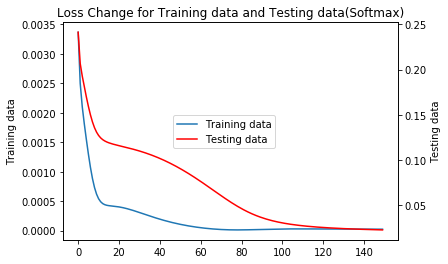

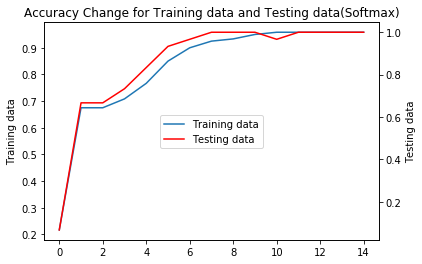

In [18]:
H = 10
batch_size = 2
iter_per_epoch = int(np.ceil(training_num/batch_size))
epoch_num = 150
N, D_in, H, D_out = training_num, D, H, C

x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))
b1 = tf.Variable(tf.random_normal((1, H)))

h1 = tf.matmul(x, w1)
h = tf.add(h1, b1)
h_softmax = tf.nn.softmax(h)
y_pred = tf.matmul(h_softmax, w2)

loss = tf.reduce_mean((y-y_pred)**2)

grad_w1, grad_w2, grad_b1= tf.gradients(loss, [w1, w2, b1])

learning_rate = 0.1
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)
new_b1 = b1.assign(b1 - learning_rate * grad_b1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_vals = []
    loss_vals_testing = []
    accuracy_training = []
    accuracy_testing = []
    for epoch in range(epoch_num):
        loss_epoch = 0
        for i in range(iter_per_epoch):
            xb = training_samples[i*batch_size:(i+1)*batch_size]
            yb = training_labels[i*batch_size:(i+1)*batch_size]
            loss_value, _, _,_= sess.run([loss, new_w1, new_w2, new_b1], 
                                        feed_dict={x:xb,y:yb})
            loss_epoch += loss_value
        loss_vals.append(loss_value/iter_per_epoch)
        loss_value = sess.run([loss], feed_dict={x:testing_samples,y:testing_labels})
        loss_vals_testing.append(loss_value)
        if epoch % 10 == 0:
            [y_pred1] = sess.run([y_pred], feed_dict={x:training_samples})
            corrects = 0
            for (y1, y2) in zip(y_pred1, training_labels):
                label = y1.argmax(axis=0)
                corrects += y2[label] 
            accuracy_training.append(corrects/len(training_labels))
           
            [y_pred1] = sess.run([y_pred], feed_dict={x:testing_samples})
            corrects = 0
            for (y1, y2) in zip(y_pred1, testing_labels):
                label = y1.argmax(axis=0)
                corrects += y2[label] 
            accuracy_testing.append(corrects/len(testing_labels))
    
    fig1 = plt.figure()
    ax11 = fig1.add_subplot(111)
    ax11.set_title('Loss Change for Training data and Testing data(Softmax)')
    ax11.plot(loss_vals, label='Training data')
    ax11.set_ylabel('Training data')
    ax12 = ax11.twinx() 
    ax12.plot(loss_vals_testing, 'r', label='Testing data')
    ax12.set_ylabel('Testing data')
    fig1.legend(loc='center')
    
    fig2 = plt.figure()
    ax21 = fig2.add_subplot(111)
    ax21.set_title('Accuracy Change for Training data and Testing data(Softmax)')
    ax21.plot(accuracy_training, label='Training data')
    ax21.set_ylabel('Training data')
    ax22 = ax21.twinx() 
    ax22.plot(accuracy_testing, 'r', label='Testing data')
    ax22.set_ylabel('Testing data')
    fig2.legend(loc='center')
    #plt.plot(range(1, epoch_num+1), loss_vals, loss_vals_pre)
    
    [y_pred1] = sess.run([y_pred], feed_dict={x:testing_samples})
    corrects = 0
    for (y1, y) in zip(y_pred1, testing_labels):
        label = y1.argmax(axis=0)
        corrects += y[label]
    print (corrects/len(testing_samples))
        

# Task 3

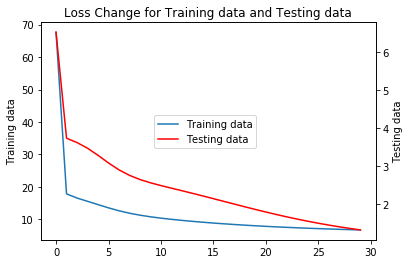

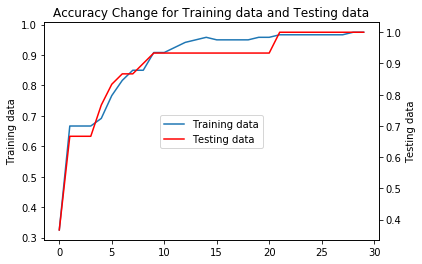

In [22]:
H = 10
batch_size = 3
iter_per_epoch = int(np.ceil(training_num/batch_size))
epoch_num = 300
N, D_in, H, D_out = training_num, D, H, C
learning_rate = 0.1

W1 = np.random.rand(D_in, H)
b1 = np.random.rand(1, H)
W2 = np.random.rand(H, D_out)
b2 = np.random.rand(1, D_out)

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

loss_vals_training = []
loss_vals_testing = []
accuracy_training = []
accuracy_testing = []
for epoch in range(epoch_num):
    loss_epoch = 0
    for i in range(iter_per_epoch):
        delta_W1 = np.zeros([D_in, H])
        delta_b1 = np.zeros([1, H])
        delta_W2 = np.zeros([H, D_out])
        delta_b2 = np.zeros([1, D_out])
        xb = training_samples[i*batch_size:(i+1)*batch_size]
        yb = training_labels[i*batch_size:(i+1)*batch_size]
        for (x, y) in zip(xb, yb):
            #forward
            xh = x.dot(W1) + b1
            ah = sigmoid(xh)
            yo = ah.dot(W2) + b2
            loss_epoch += np.mean((yo-y)**2)
            #backprop
            dy = yo-y
            db2 = dy
            dW2 = ah.transpose().dot(db2)
            dah = dy.dot(W2.transpose())
            dxh = derivative_sigmoid(ah)*dah
            db1 = dxh
            dW1 = x.reshape(1,-1).transpose().dot(dxh)
            delta_W1 += dW1
            delta_W2 += dW2           
            delta_b1 += db1
            delta_b2 += db2
        W1 -= learning_rate*delta_W1
        W2 -= learning_rate*delta_W2
        b1 -= learning_rate*delta_b1
        b2 -= learning_rate*delta_b2
        
    if (epoch % 10 == 0):
        loss_vals_training.append(loss_epoch)
        loss_testing = 0
        corrects = 0
        for (x, y) in zip(testing_samples, testing_labels):
            #forward
            xh = x.dot(W1) + b1
            ah = sigmoid(xh)
            yo = ah.dot(W2) + b2
            loss_testing += np.mean((yo-y)**2)
            corrects += y[yo.argmax()]
        loss_vals_testing.append(loss_testing)
        accuracy_testing.append(corrects/len(testing_labels))
        
        corrects = 0
        for (x, y) in zip(training_samples, training_labels):
            #forward
            xh = x.dot(W1) + b1
            ah = sigmoid(xh)
            yo = ah.dot(W2) + b2
            corrects += y[yo.argmax()] 
        accuracy_training.append(corrects/len(training_labels))       

fig1 = plt.figure()
ax11 = fig1.add_subplot(111)
ax11.set_title('Loss Change for Training data and Testing data')
ax11.plot(loss_vals_training, label='Training data')
ax11.set_ylabel('Training data')
ax12 = ax11.twinx() 
ax12.plot(loss_vals_testing, 'r', label='Testing data')
ax12.set_ylabel('Testing data')
fig1.legend(loc='center')
    
fig2 = plt.figure()
ax21 = fig2.add_subplot(111)
ax21.set_title('Accuracy Change for Training data and Testing data')
ax21.plot(accuracy_training, label='Training data')
ax21.set_ylabel('Training data')
ax22 = ax21.twinx() 
ax22.plot(accuracy_testing, 'r', label='Testing data')
ax22.set_ylabel('Testing data')
fig2.legend(loc='center')
    #plt.plot(range(1, epoch_num+1), loss_vals, loss_vals_pre)

# Task2

The testing accuray is 0.9633999999999985
The testing accuray is 0.9812999999999977
The testing accuray is 0.9837999999999978
The testing accuray is 0.9855999999999976
The testing accuray is 0.9869999999999978
The testing accuray is 0.9881999999999979
The testing accuray is 0.9890999999999978
The testing accuray is 0.9891999999999977
The testing accuray is 0.9894999999999977
The testing accuray is 0.9896999999999976
The testing accuray is 0.9897999999999977
The testing accuray is 0.9898999999999977
The testing accuray is 0.9890999999999978
The testing accuray is 0.9897999999999976
The testing accuray is 0.9899999999999977
The testing accuray is 0.9899999999999977
The testing accuray is 0.9902999999999977


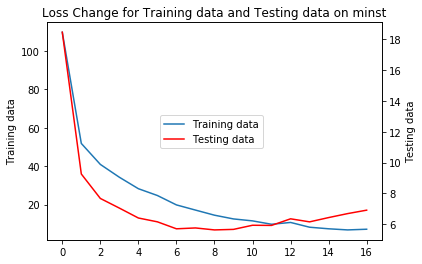

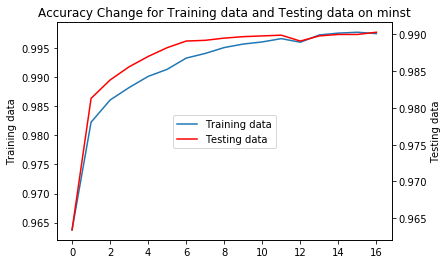

In [9]:
import numpy as np
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math
import torch.nn.functional as F
from torch.autograd import Variable
import time

mnist_data = sio.loadmat('MNIST')
mnist_samples = mnist_data['fea']
mnist_labels = mnist_data['gnd']

N, D = mnist_samples.shape
N, C = mnist_labels.shape

idx = list(range(N))
np.random.shuffle(idx)
mnist_samples = mnist_samples[idx]
mnist_labels = mnist_labels[idx]

mnist_samples = np.array(mnist_samples, dtype='float')
mnist_samples /= np.max(np.abs(mnist_samples))
mnist_samples -= np.mean(mnist_samples, axis=0)
training_num = 60000
testing_num = N - training_num

training_samples = mnist_samples[:training_num]
training_labels = mnist_labels[:training_num]
testing_samples = mnist_samples[training_num:]
testing_labels = mnist_labels[training_num:]

class mnet(nn.Module):
    def __init__(self):
        super(mnet,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 20, 5, bias = False),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 20, 5, bias = False),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(320, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.layer3(x)
        return x
net = mnet()
#define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 0.1)

training_loss_vals = []
testing_loss_vals = []
training_accuracy_vals = []
testing_accuracy_vals = []


batch = 64

for epoch in range(20):
    net.train()
    for i in range(math.ceil(training_num/batch)):
        im = training_samples[i*batch:(i+1)*batch]
        label = training_labels[i*batch:(i+1)*batch].reshape(-1)
        im = Variable(torch.from_numpy(im.reshape(-1,1,28,28))).float()
        label = Variable(torch.from_numpy(label)).long()
        # forward
        out = net(im)
        loss = criterion(out, label)
        #print (loss)
        # backdrop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # switch the model to evalutaion
    net.eval()

    loss = 0
    acc = 0
    for i in range(math.ceil(training_num/batch)):
        im = training_samples[i*batch:(i+1)*batch]
        label = training_labels[i*batch:(i+1)*batch].reshape(-1)
        im = Variable(torch.from_numpy(im.reshape(-1,1,28,28))).float()
        label = Variable(torch.from_numpy(label)).long()
        # forward
        out = net(im)
        loss += criterion(out, label).item()
        _, pred = out.max(1)
        acc += (pred == label).sum().item() / training_num

    training_loss_vals.append(loss)
    training_accuracy_vals.append(acc)

    loss = 0
    acc = 0
    for i in range(math.ceil(testing_num/batch)):
        im = testing_samples[i*batch:(i+1)*batch]
        label = testing_labels[i*batch:(i+1)*batch].reshape(-1)
        im = Variable(torch.from_numpy(im.reshape(-1,1,28,28))).float()
        label = Variable(torch.from_numpy(label)).long()
        # forward
        out = net(im)
        loss += criterion(out, label).item()
        _, pred = out.max(1)
        acc += (pred == label).sum().item() / testing_num
    
        
    testing_loss_vals.append(loss)
    testing_accuracy_vals.append(acc)
    
    print ('The testing accuray is', acc)
    
    if (acc > 0.99):
        break


fig1 = plt.figure()
ax11 = fig1.add_subplot(111)
ax11.set_title('Loss Change for Training data and Testing data on minst')
ax11.plot(training_loss_vals, label='Training data')
ax11.set_ylabel('Training data')
ax12 = ax11.twinx() 
ax12.plot(testing_loss_vals, 'r', label='Testing data')
ax12.set_ylabel('Testing data')
fig1.legend(loc='center')
    
fig2 = plt.figure()
ax21 = fig2.add_subplot(111)
ax21.set_title('Accuracy Change for Training data and Testing data on minst')
ax21.plot(training_accuracy_vals, label='Training data')
ax21.set_ylabel('Training data')
ax22 = ax21.twinx() 
ax22.plot(testing_accuracy_vals, 'r', label='Testing data')
ax22.set_ylabel('Testing data')
fig2.legend(loc='center')
        
        